<h1><strong>Correlation in Python</strong></h1>	

Topics covered:

- **Import libraries and Load data**: `pd.read_csv()`

- **Data Exploration**: `shape`, `columns`, `info()`, `describe()`

- **Data Cleaning and Validation**

    - Identify missing data `isna().sum()` or `isna().mean()`
    
    - Deal with missing data: `dropna()`, `fillna()`
    - Check data types: `dtypes`
    - Covert data types: `astype()`, `pd.to_datetime`, `pd.to_numeric`
    - Extract values from a column: `.str.split()`
    - Check duplicated values: `duplicated()`, `duplicated().sum() `
    - Drop duplicates: `drop_duplicates()`
    - Identify outliers: `boxplot()`

- **Correlation**
    - Correlation between 2 variables: `scatterplot()`, `regplot()`
    
    - Correlation matrix and its visualization: `DataFrame.corr()`, `heatmap()`
    - Calculate correlation of non-numeric data type: `.astype('category').cat.codes`
    - Unstacking a correlation matrix: `unstack()`

## Import libraries and load data

In [224]:
import pandas as pd
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None) # display all outputs
pd.reset_option('display.max_rows')

from IPython.core.interactiveshell import InteractiveShell # print all the interactive output without resorting to print, not only the last result
InteractiveShell.ast_node_interactivity = "all"

In [225]:
movies = pd.read_csv('datasets/movies.csv')
movies.head(1)
# movies[movies['budget'].isna()]
# len(movies)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0


## Data Exploration

In [226]:
movies.shape
movies.columns
movies.info()

(7668, 15)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [227]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Data Cleaning and Validation

In [228]:
# identify missing data 
movies.isnull().sum().sort_values(ascending=False) # => total count of missing data 
round(movies.isnull().mean()*100).sort_values(ascending=False) # => normalize count of missing data 


budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

budget      28.0
gross        2.0
rating       1.0
name         0.0
genre        0.0
year         0.0
released     0.0
score        0.0
votes        0.0
director     0.0
writer       0.0
star         0.0
country      0.0
company      0.0
runtime      0.0
dtype: float64

In [229]:
# Handle missing data 
    # drop all missing data 
movies.dropna(inplace=True) # the dataset length remains with ~71%  

# other way: imputing missing values with median for column(s) with more than 5% missing data if we have a small dataset 
# movies['budget'].fillna(movies['budget'].median(), inplace=True)

In [230]:
# check data types
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [231]:
# replace "Unrated" to "Not Rated" 
movies['rating'] = movies['rating'].str.replace('Unrated', 'Not Rated')
movies.rating.value_counts()

# convert budget and gross from float to int 
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      61
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

In [232]:
# split released column to 2 columns: released_date and released_location
# movies[['released_date', 'released_location']] = movies['released'].str.split("(", expand=True) # split released columns
# movies['released_location'] = movies['released_location'].str.replace(')', '')#.str.strip() # trim white space

# movies['released_date'] = movies['released'].str.split("(", expand=True)[0].str.strip() # split released column to one column only  

In [233]:
# # convert inconsistent date format 'MMM D, YYYY', 'MMM YYYY', 'YYYY'
# # examine 
# movies['released_month'] = movies['released_date'].str.extract('([a-zA-Z]+)', expand=True) # extract month value of released_date 

#     # extract 4-digit year values
# movies['released_year'] = movies['released_date'].str.extract(r'(\d{4})\b', expand=True).astype('int64') 
# movies['released_year'] = pd.to_numeric(movies['released'].str.extract(pat='([0-9]{4})')[0], errors='coerce').astype('int64') # alternative 

# movies['released_day'] = movies['released_date'].str.extract(r'\s(\d{1,2}),', expand=False) # extract day value  
# movies['released_day'] = pd.to_numeric(movies['released_day'], errors='coerce').fillna(0).astype('int64')

# # convert to date format using pandas function: to_datetime()
#     # convert records having "MMM D, YYYY" format to datetime, specifying null values if not match with errors='coerce'
# movies['released_date'] = pd.to_datetime(movies['released_date'], format='%B %d, %Y', errors='coerce').fillna( 
#     # fill missing values which does not match "MMM D, YYYY" format 
#     pd.to_datetime(movies['released_date'], format='%B %Y', errors='coerce').fillna(   
#         # fill value which does not match "MMM YYYY"
#         pd.to_datetime(movies['released_date'], format='%Y', errors='coerce')
#     )
# )
# # movies['released_date'] = pd.to_datetime(movies['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format = '%B %d, %Y')
# movies.loc[0:3, 'released_date']

In [234]:
# extract year from released column
movies['released_year'] = movies['released'].str.split("(", expand=True)[0].str.strip() \
                                        .astype(str).str[-4:].astype(int)

In [235]:
# check duplicate values 
movies.duplicated().sum()
movies[movies.duplicated()]

# if duplicated values exist => drop them 
# movies.drop_duplicates()

0

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year


<AxesSubplot:>

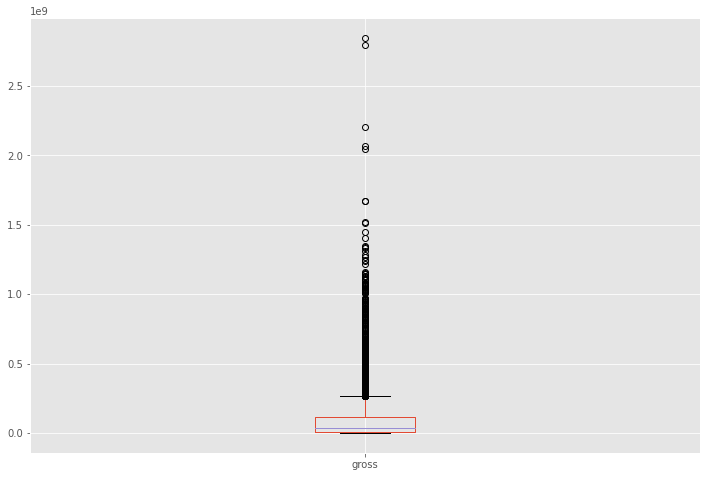

In [236]:
# check outlier of revenue ("gross" column)
movies.boxplot(column='gross')

## Correlation

In [237]:
# sort dataframe with the highest gross on top 
movies.sort_values(by=['gross'], ascending=False, inplace=True)
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997


<AxesSubplot:xlabel='budget', ylabel='gross'>

Text(0.5, 1.0, 'Budget vs. Gross Earnings')

Text(0.5, 0, 'Gross Earnings')

Text(0, 0.5, 'Budget for Film')

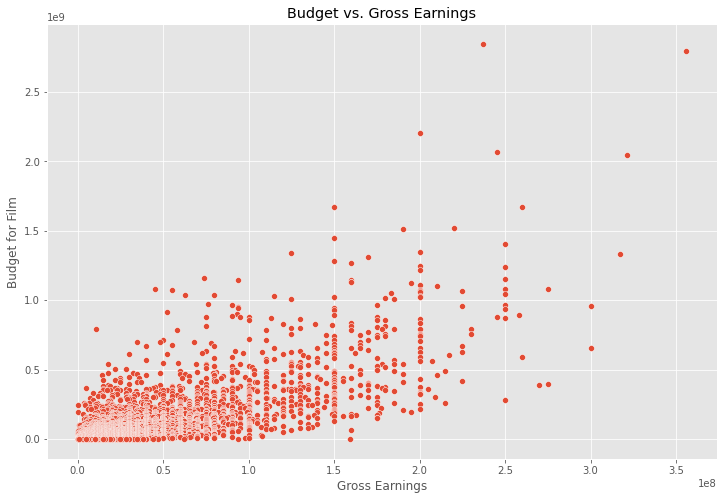

In [238]:
sns.scatterplot(data=movies, x='budget', y='gross')
plt.title("Budget vs. Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Film")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

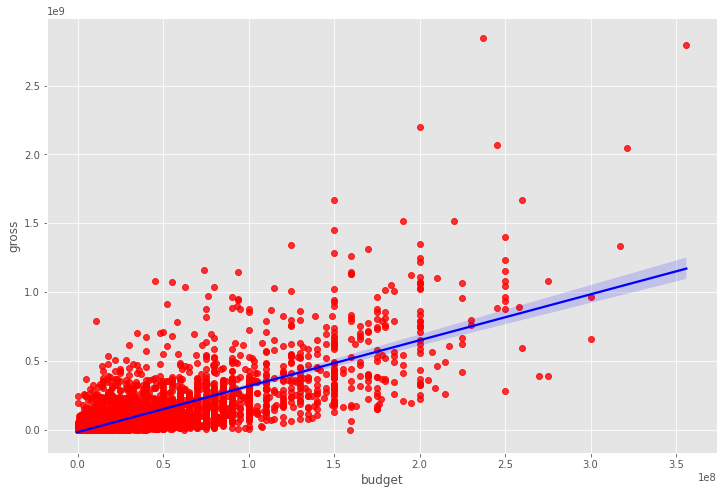

In [239]:
sns.regplot(data=movies, x='budget', y='gross', scatter_kws={"color": "red"}, line_kws={"color": "blue"}) # determine whether budget and gross are correlated
# possitive correlation 

In [240]:
# identify how much correlation
# three ways to determine correlation: pearson (default), kendall, spearman
corr_matrix = movies.select_dtypes(include=np.number).corr(method='pearson')
corr_matrix # budget and gross have high and positive correlation

,year,score,votes,budget,gross,runtime,released_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
released_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Metrix for Numeric Features')

Text(0.5, 50.09375, 'Movie Features')

Text(86.09375, 0.5, 'Movie Features')

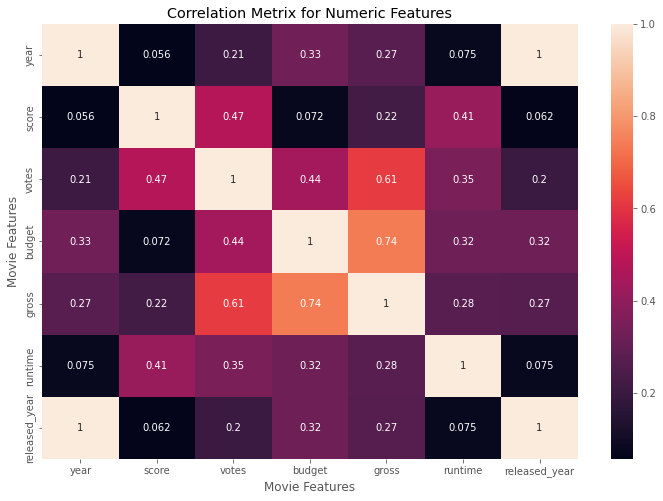

In [241]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Metrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

In [242]:
movies_numerized = movies.copy()

for col in movies_numerized.columns:
    if movies_numerized[col].dtype == 'object':
        movies_numerized[col] = movies_numerized[col].astype('category')
        movies_numerized[col] = movies_numerized[col].cat.codes

movies_numerized.head(3) # print 2 outputs for making comparisons
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997


<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Metrix for Numeric Features')

Text(0.5, 50.09375, 'Movie Features')

Text(86.09375, 0.5, 'Movie Features')

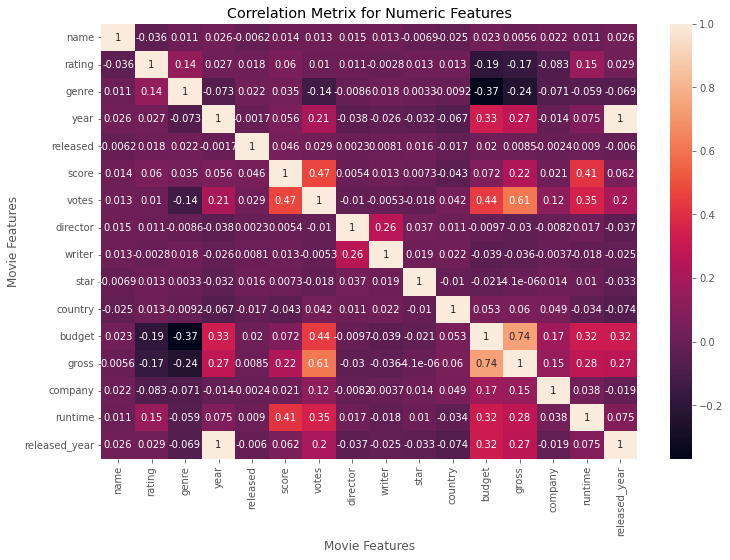

In [243]:
sns.heatmap(movies_numerized.corr(), annot=True)
plt.title("Correlation Metrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

Columns with correlation:

- company has little bit correlation with gross and revenue => initial hypothesis that the company is significant => is not necessarily correct
- gross and budget have strong correlation with 0.71
- corr(gross, votes) = 0.61 => many votes are those made more money
- corr(gross, runtime) = 0.28 => longer runtime sometimes brings more money 


In [249]:
# organize => identify correlation quickly by unstacking 
corr_matr = movies_numerized.corr()
corr_pairs = corr_matr.unstack() # unstacking correlation matrix
corr_pairs.sort_values(ascending=False, inplace=True)
corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1)].sort_values(ascending=False)

year           released_year    0.998726
released_year  year             0.998726
budget         gross            0.740247
gross          budget           0.740247
               votes            0.614751
votes          gross            0.614751
dtype: float64

>**Insights: Votes and Budget have the highest correlation to gross earnings**